In [127]:
import cv2
print(f'openCV: {cv2.__version__}')
import numpy as np
from PIL import Image
import random
import matplotlib.pyplot as plt

openCV: 4.4.0


# 1) Add your own salt and pepper filter (values are up to you)



In [128]:
def SaltAndPepper_Noise(image,prob):
    '''
    method takes image and prob values which is between 0 and 1.
    '''
    output = np.zeros(image.shape,np.uint8)#output will be uint8 type
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()  #adding random noise to image
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

image_sp = cv2.imread('santralistanbul-campus-08.jpg') #read image from file
noise_img = SaltAndPepper_Noise(image_sp,0.03) #max value for prob = 1
cv2.imwrite('sp_noise.jpg', noise_img) #creating .jpg file in the directory

sp_noise_img = cv2.imread('sp_noise.jpg') #this is not necessary i wrote it for see the picture
cv2.imshow('sp_noise_img', sp_noise_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 2) Add strap lines to original image

I understand this question as: 'add borders to picture' so I added bordes to the four side of picture. I used a openCV method for this. 30s are that in placed method means, length of borders.

In [129]:
img_strap = cv2.imread('santralistanbul-campus-08.jpg')
row, col = img_strap.shape[:2]
bottom = img_strap[row-2:row, 0:col]
mean = cv2.mean(bottom)[0]

border = cv2.copyMakeBorder(img_strap, 30, 30, 30, 30, cv2.BORDER_CONSTANT, value=[mean, mean, mean])

cv2.imshow('strap_line_picture', border)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 3) Add Gaussian blur to original image

In [136]:
img_gauss = cv2.imread('santralistanbul-campus-08.jpg')
img_RGB = cv2.cvtColor(img_gauss, cv2.COLOR_BGR2RGB)
blurred_img = cv2.GaussianBlur(img_RGB, (5,5), 0)
cv2.imshow('gaus', blurred_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 4)Use smoothing method on one of the images

It is a library method. I smoothed two pictures that I created above and original image. (I read image in every question for not confuse questions)

In [131]:
img_smoothed = cv2.imread('santralistanbul-campus-08.jpg')
median_blurring = cv2.medianBlur(img_smoothed,5)
cv2.imshow('Smoothing Method', median_blurring)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
median_blurring = cv2.medianBlur(noise_img,5)
cv2.imshow('Smoothing Method', median_blurring)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
median_blurring = cv2.medianBlur(blurred_img,5)
cv2.imshow('Smoothing Method', median_blurring)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 5) plot results with explanations (which image is which, what filter used on them, etc.)

Text(0.5, 1.0, 'Median Blur(smoothed)')

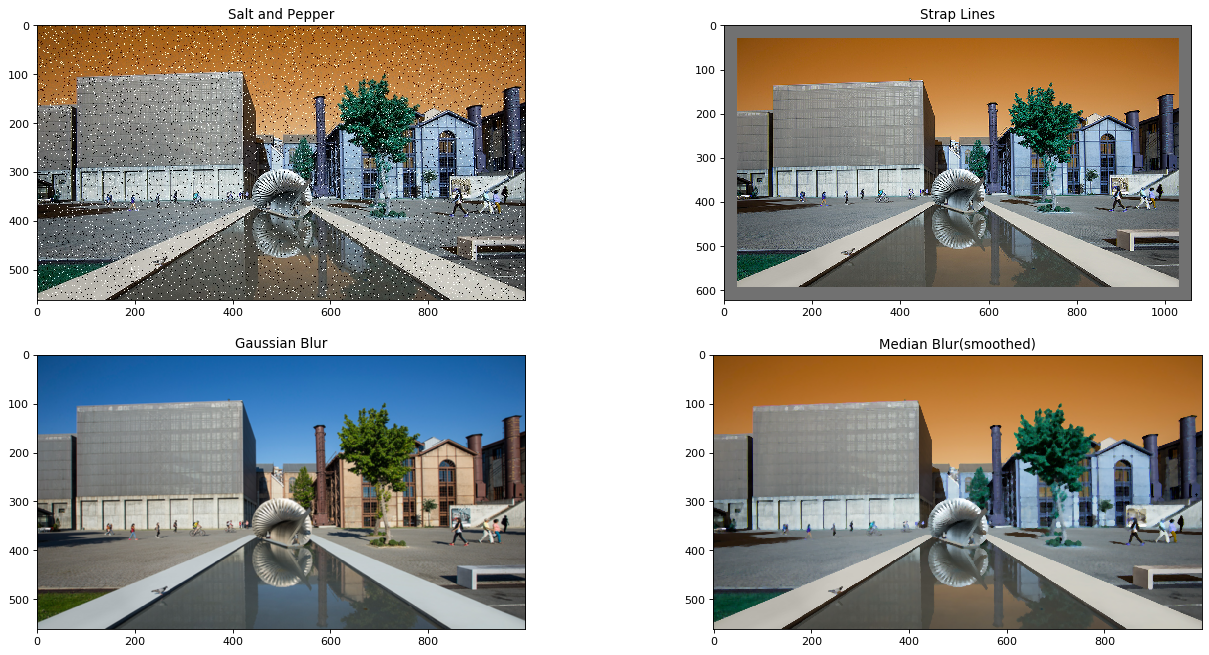

In [132]:
plt.figure(num=None, figsize=(20,10), dpi=80, facecolor='w', edgecolor='k')
#plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.imshow(sp_noise_img)
plt.gca().set_title('Salt and Pepper')

plt.subplot(2,2,2)
plt.imshow(border)
plt.gca().set_title('Strap Lines')

plt.subplot(2,2,3)
plt.imshow(blurred_img)
plt.gca().set_title('Gaussian Blur')

plt.subplot(2,2,4)
plt.imshow(median_blurring)
plt.gca().set_title('Median Blur(smoothed)')
